In [2]:
#pip install lenstronomy
!pip install pillow



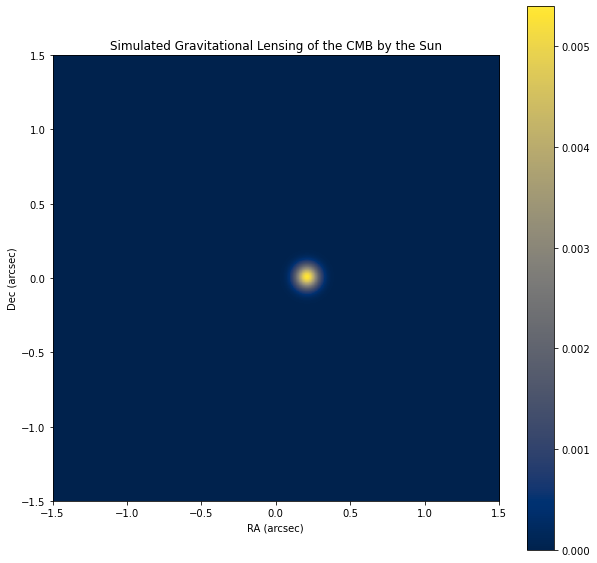

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LightModel.light_model import LightModel
from lenstronomy.Data.pixel_grid import PixelGrid
from lenstronomy.Data.psf import PSF
from lenstronomy.ImSim.image_model import ImageModel
from PIL import Image, ImageDraw, ImageFont

def create_text_image(text, font_size=100, font_path='arial.ttf'):
    font = ImageFont.truetype(font_path, font_size)
    size = font.getsize(text)
    img = Image.new('L', size, color=0)
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), text, font=font, fill=255)
    return img

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
c = 3e8  # Speed of light, m/s
M_sun = 1.989e30  # Solar mass, kg
D_lens = 1.5e11  # Distance from observer to lens (Sun), m
D_source = 1.4e10 * 3.26 * 9.461e15  # Approx. distance to CMB, m

# Lens properties
theta_E = np.sqrt(4 * G * M_sun / (c ** 2) * (1 / D_lens - 1 / D_source))  # Einstein radius
lens_model_list = ['SPEP']
lensModel = LensModel(lens_model_list)

kwargs_spep = {'theta_E': theta_E, 'e1': 0, 'e2': 0,'gamma': 2 ,'center_x': 0, 'center_y': 0}
kwargs_lens = [kwargs_spep]

# Light properties (CMB)
light_model_list = ['GAUSSIAN']
lightModel = LightModel(light_model_list)

kwargs_cmb = {'amp': 1, 'sigma': 0.05, 'center_x': 0.2, 'center_y': 0}
kwargs_light = [kwargs_cmb]

# Pixel grid and PSF
delta_pix = 0.01  # size of pixel in angular coordinates
num_pix = 300  # number of pixels (square)

ra_at_xy_0, dec_at_xy_0 = -delta_pix * num_pix / 2, -delta_pix * num_pix / 2
transform_pix2angle = np.array([[1, 0], [0, 1]]) * np.array([[delta_pix, 0], [0, delta_pix]])

pixel_grid = PixelGrid(num_pix,num_pix,transform_pix2angle, ra_at_xy_0, dec_at_xy_0)


psf_fwhm = 0.05  # FWHM of PSF
psf = PSF(psf_type='GAUSSIAN', fwhm=psf_fwhm)

# Image model
image_model = ImageModel(pixel_grid, psf, lensModel, lightModel)

# Simulate lensed CMB image
image = image_model.image(kwargs_lens, kwargs_light)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='cividis', origin='lower', extent=[ra_at_xy_0, -ra_at_xy_0, dec_at_xy_0, -dec_at_xy_0])
plt.colorbar()
plt.xlabel('RA (arcsec)')
plt.ylabel('Dec (arcsec)')
plt.title('Simulated Gravitational Lensing of the CMB by the Sun')
plt.show()



Saved lensed image for letter "A" to lensed_alphabet\lensed_A.png
Saved lensed image for letter "B" to lensed_alphabet\lensed_B.png
Saved lensed image for letter "C" to lensed_alphabet\lensed_C.png
Saved lensed image for letter "D" to lensed_alphabet\lensed_D.png
Saved lensed image for letter "E" to lensed_alphabet\lensed_E.png
Saved lensed image for letter "F" to lensed_alphabet\lensed_F.png
Saved lensed image for letter "G" to lensed_alphabet\lensed_G.png
Saved lensed image for letter "H" to lensed_alphabet\lensed_H.png
Saved lensed image for letter "I" to lensed_alphabet\lensed_I.png
Saved lensed image for letter "J" to lensed_alphabet\lensed_J.png
Saved lensed image for letter "K" to lensed_alphabet\lensed_K.png
Saved lensed image for letter "L" to lensed_alphabet\lensed_L.png
Saved lensed image for letter "M" to lensed_alphabet\lensed_M.png
Saved lensed image for letter "N" to lensed_alphabet\lensed_N.png
Saved lensed image for letter "O" to lensed_alphabet\lensed_O.png
Saved lens

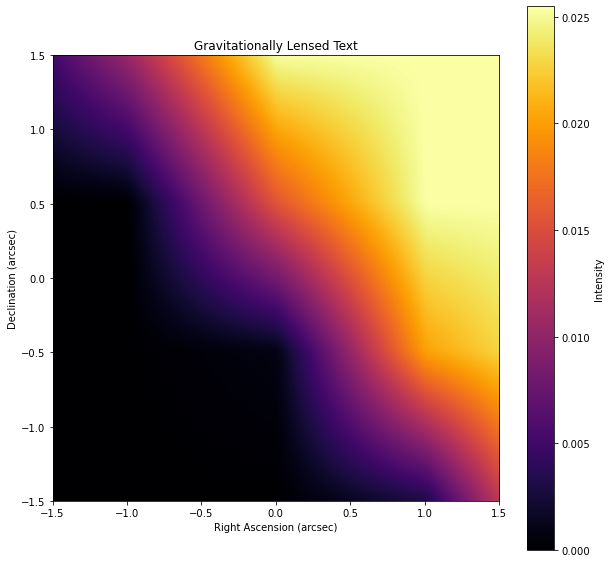

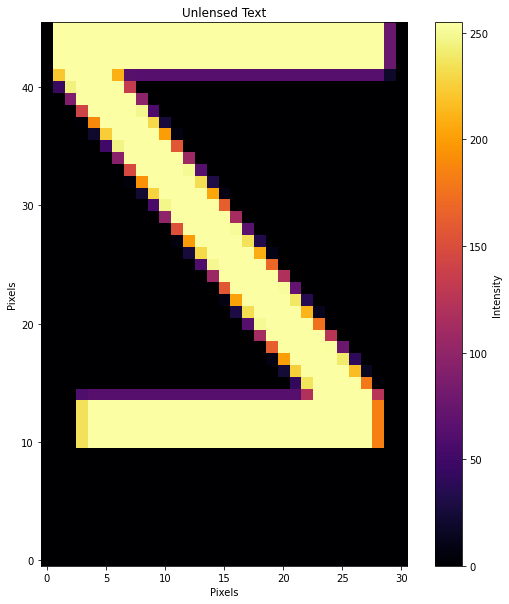

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from lenstronomy.Data.pixel_grid import PixelGrid
from lenstronomy.Data.psf import PSF
from lenstronomy.ImSim.image_model import ImageModel
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LightModel.light_model import LightModel
from lenstronomy.LightModel.Profiles.interpolation import Interpol

def create_text_image(text, font_size=500, font_path='arial.ttf'):
    font = ImageFont.truetype(font_path, font_size)
    size = font.getsize(text)
    img = Image.new('L', size, color=0)
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), text, font=font, fill=255)
    return img

output_folder = 'lensed_alphabet'  # Set the output folder for the images

# Create the output folder if it doesn't exist
import os
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through the alphabet
# Loop through the alphabet
for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
    # Create a text image for the current letter
    text_image = create_text_image(letter, font_size=50)
    text_image_array = np.array(text_image).astype(float)

    # Create a new Interpol light model with the current letter's image
    interpol_light_model = Interpol()
    kwargs_interpol = {'image': text_image_array, 'amp': 1, 'center_x': 0, 'center_y': 0, 'phi_G': 0, 'scale': 1}

    # Create a new LightModel instance for each letter
    lightModel = LightModel(light_model_list=['INTERPOL'])
    kwargs_light = [kwargs_interpol]

    # Create a new ImageModel instance for each letter
    image_model = ImageModel(pixel_grid, psf, lensModel, lightModel)

    # Simulate lensed text image
    image = image_model.image(kwargs_lens, kwargs_light)

    # Save the lensed image to a file
    output_file = os.path.join(output_folder, f'lensed_{letter}.png')
    plt.imsave(output_file, image, cmap='inferno', origin='lower', dpi=300)

    print(f'Saved lensed image for letter "{letter}" to {output_file}')




G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
c = 3e8  # Speed of light, m/s
M_sun = 1.989e30  # Solar mass, kg
D_lens = 8.227883e8  # Distance from observer to lens (Sun), m
D_source = 1.4e10 * 3.26 * 9.461e15  # Approx. distance to CMB, m

# Create a text image
#text_image = create_text_image("X", font_size=50)
text_image_array = np.array(text_image).astype(float)

# Set up the Interpol light model
#interpol_light_model = Interpol()
#kwargs_interpol = {'image': text_image_array, 'amp': 1, 'center_x': 0, 'center_y': 0, 'phi_G': 0, 'scale': 1}

# Pixel grid and PSF
delta_pix = 0.01
num_pix = 300

ra_at_xy_0, dec_at_xy_0 = -delta_pix * num_pix / 2, -delta_pix * num_pix / 2
transform_pix2angle = np.array([[1, 0], [0, 1]]) * np.array([[delta_pix, 0], [0, delta_pix]])

pixel_grid = PixelGrid(num_pix,num_pix,transform_pix2angle, ra_at_xy_0, dec_at_xy_0)


psf_fwhm = 0.01
psf = PSF(psf_type='GAUSSIAN', fwhm=psf_fwhm)

# Lens model
lensModel = LensModel(lens_model_list=['SPEP'])
theta_E = np.sqrt(4 * G * M_sun / (c ** 2) * (1 / D_lens - 1 / D_source))  # Einstein radius
e1, e2 = 0, 0
kwargs_lens = [{'theta_E': theta_E, 'e1': e1, 'e2': e2, 'gamma': 2, 'center_x': 0, 'center_y': 0}]

# Light model (text image as light source)
#lightModel = LightModel(light_model_list=['INTERPOL'])
#kwargs_light = [kwargs_interpol]

# Image model
#image_model = ImageModel(pixel_grid, psf, lensModel, lightModel)

# Simulate lensed text image
image = image_model.image(kwargs_lens, kwargs_light)

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(image, origin='lower', cmap='inferno', extent=[ra_at_xy_0, -ra_at_xy_0, dec_at_xy_0, -dec_at_xy_0])
plt.xlabel('Right Ascension (arcsec)')
plt.ylabel('Declination (arcsec)')
plt.colorbar(label='Intensity')
plt.title('Gravitationally Lensed Text')
plt.show()

# Plot the unlensed image
plt.figure(figsize=(10, 10))
plt.imshow(text_image_array, origin='lower', cmap='inferno')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.colorbar(label='Intensity')
plt.title('Unlensed Text')
plt.show()
